<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up for Health</B> - Brompton Health PCN</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B></span><div style='margin:4px 26px; color:#273333; font-size:16px;'>
   <p>
       Exploratory Data Analysis (EDA) of <B>Missed Appointments in Primary Care</B>. <BR>Dataset collected from six NHS GP practices over a four year period (excluding Pandemic data) - Brompton Health PCN, North West London ICB.
</p>
<p>
    <B>The key features we will examine in this EDA project include:</b>
</p>

<ol>
  <li>
    <strong>Data Quality Assessment</strong>: We will begin by assessing the data quality, including checking for missing values, duplicates, and data entry errors. This step is essential for ensuring that our analysis is based on accurate and reliable information.
  </li>
  <li>
    <strong>Univariate Analysis</strong>: We will explore the distribution and summary statistics of each variable in the dataset, both categorical and numerical. This analysis will provide insights into the central tendency, dispersion, and shape of the data.
  </li>
  <li>
    <strong>Bivariate Analysis</strong>: We will investigate the relationships between pairs of variables, examining potential correlations and dependencies. This analysis will enable us to understand how the variables interact and influence each other, which can be vital when building predictive models.
  </li>
  <li>
    <strong>Multivariate Analysis</strong>: We will explore the interactions among multiple variables simultaneously, enabling us to uncover complex patterns and relationships that might not be apparent through univariate or bivariate analysis.
  </li>
  <li>
    <strong>Outlier Detection</strong>: We will identify and address any outliers in the dataset, as they can significantly impact the results of our analysis and the performance of subsequent models.
  </li>
  <li>
    <strong>Feature Engineering</strong>: Based on the insights derived from our EDA, we will create new features that may enhance our understanding of the dataset or improve the performance of predictive models.
  </li>
</ol>

<p>
  Throughout this exploratory data analysis project, we will employ various data visualization techniques, such as histograms, box plots, scatter plots, and heatmaps, to effectively communicate our findings and facilitate better decision-making. By conducting a thorough EDA, we will lay the foundation for future data-driven projects, ensuring that our analysis is based on a deep understanding of the dataset and its underlying structure.
</p>
</div>

## Loading Libraries 

In [11]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

from showupforhealth.params import *
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [12]:
data = pd.read_csv(f'{OUTPUT_DATA}/full_train_data.csv')
data.head()

,Appointment_status,Patient ID,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1.0,19580589.0,17.7,0.0,40.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22698.0,0.519419,0.816996,54.0,1.0,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,47551135.0,18.5,0.0,70.0,1.0,0.39,0.0,1.0,0.0,1.0,1.0,0.0,0.0,10169.0,0.540792,1.656309,49.0,0.0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,19579593.0,19.4,0.0,66.0,1.0,0.03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8243.0,0.332691,0.600495,37.0,0.0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,19581430.0,18.3,0.0,58.0,0.0,0.11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7626.0,0.155802,0.215224,27.0,0.0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,17407665.0,27.7,0.0,61.0,0.0,0.06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8087.0,0.451039,4.237312,38.0,0.0,30.0,-0.354605,-0.935016,0.707107,-0.707107,-0.5,-0.866025,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Appointment status

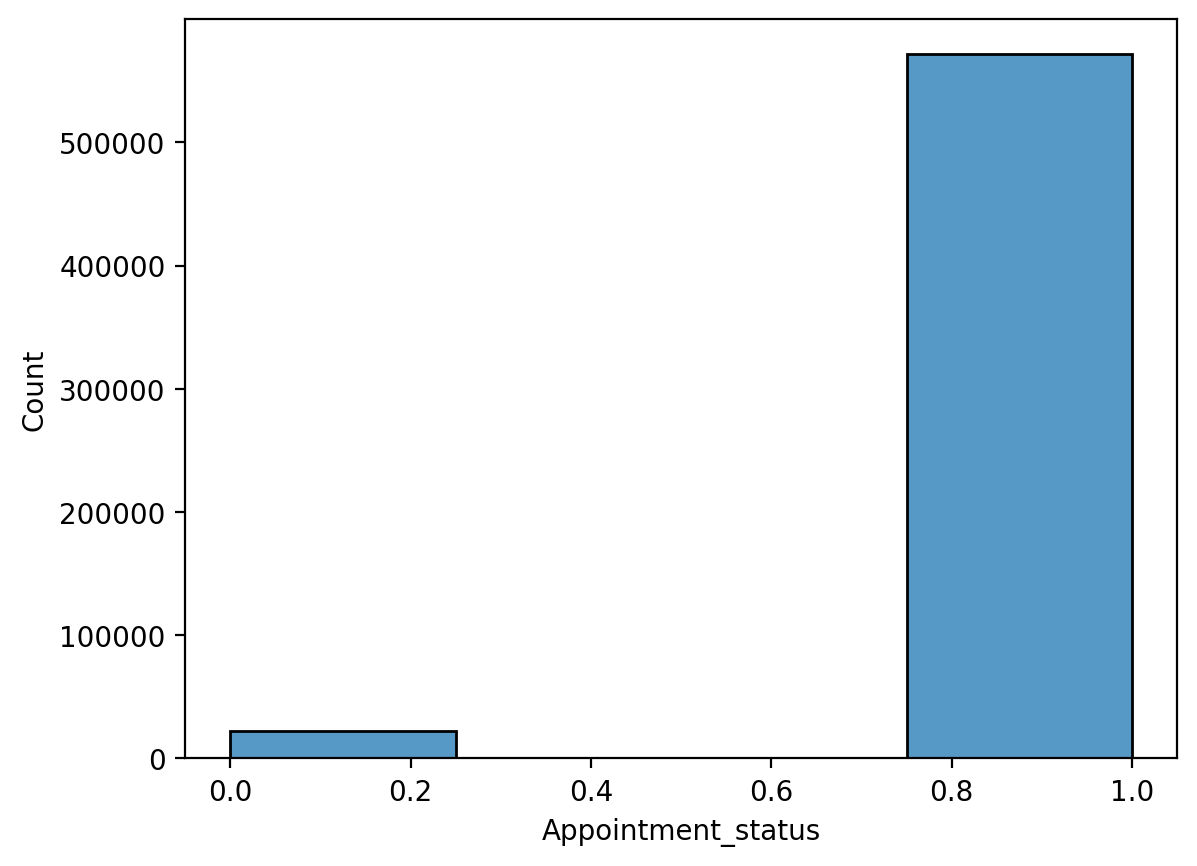

In [3]:
sns.histplot(data['Appointment_status'], bins=4);

In [4]:
print(f"Did Not Attend = {round(data['Appointment_status'].value_counts(normalize=True)[0], 3)}")
print(f"Attended = {round(data['Appointment_status'].value_counts(normalize=True)[1], 3)}")

Did Not Attend = 0.037
Attended = 0.963


# Age

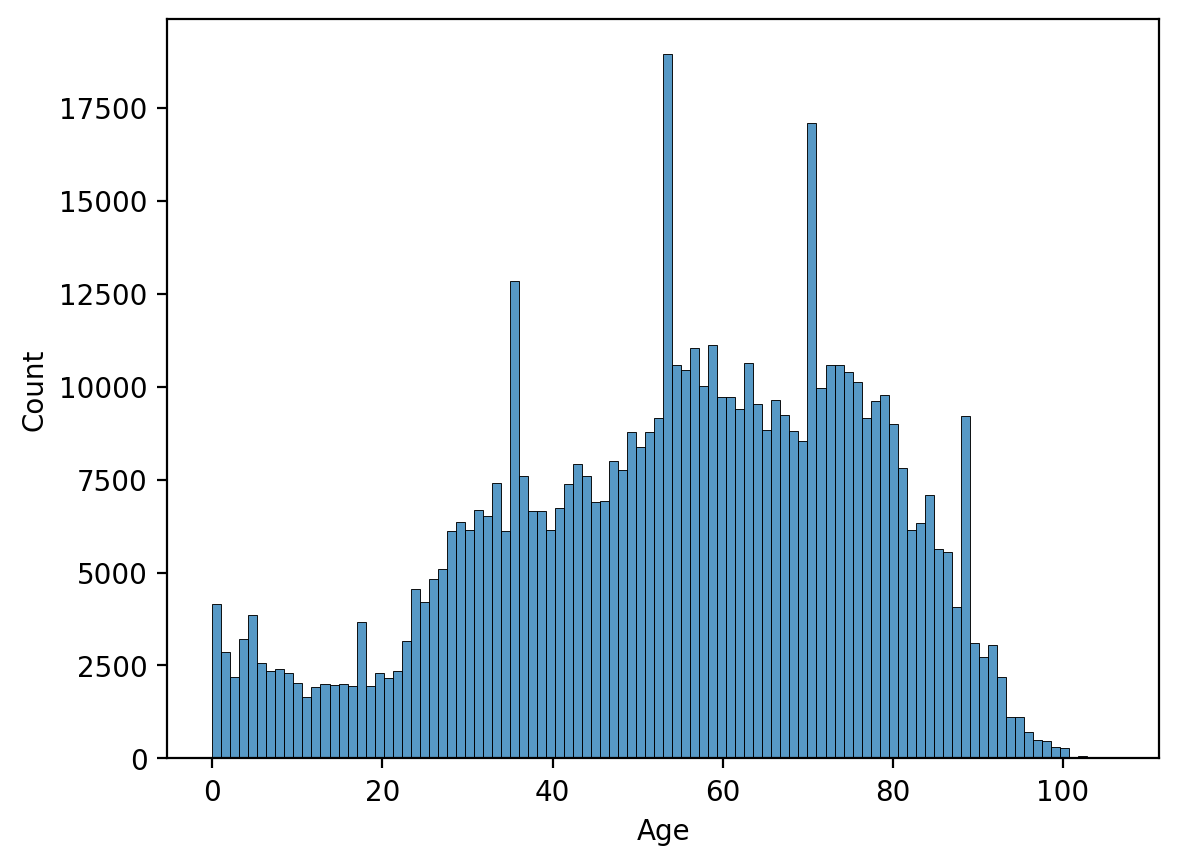

In [5]:
sns.histplot(data['Age'], bins=100);

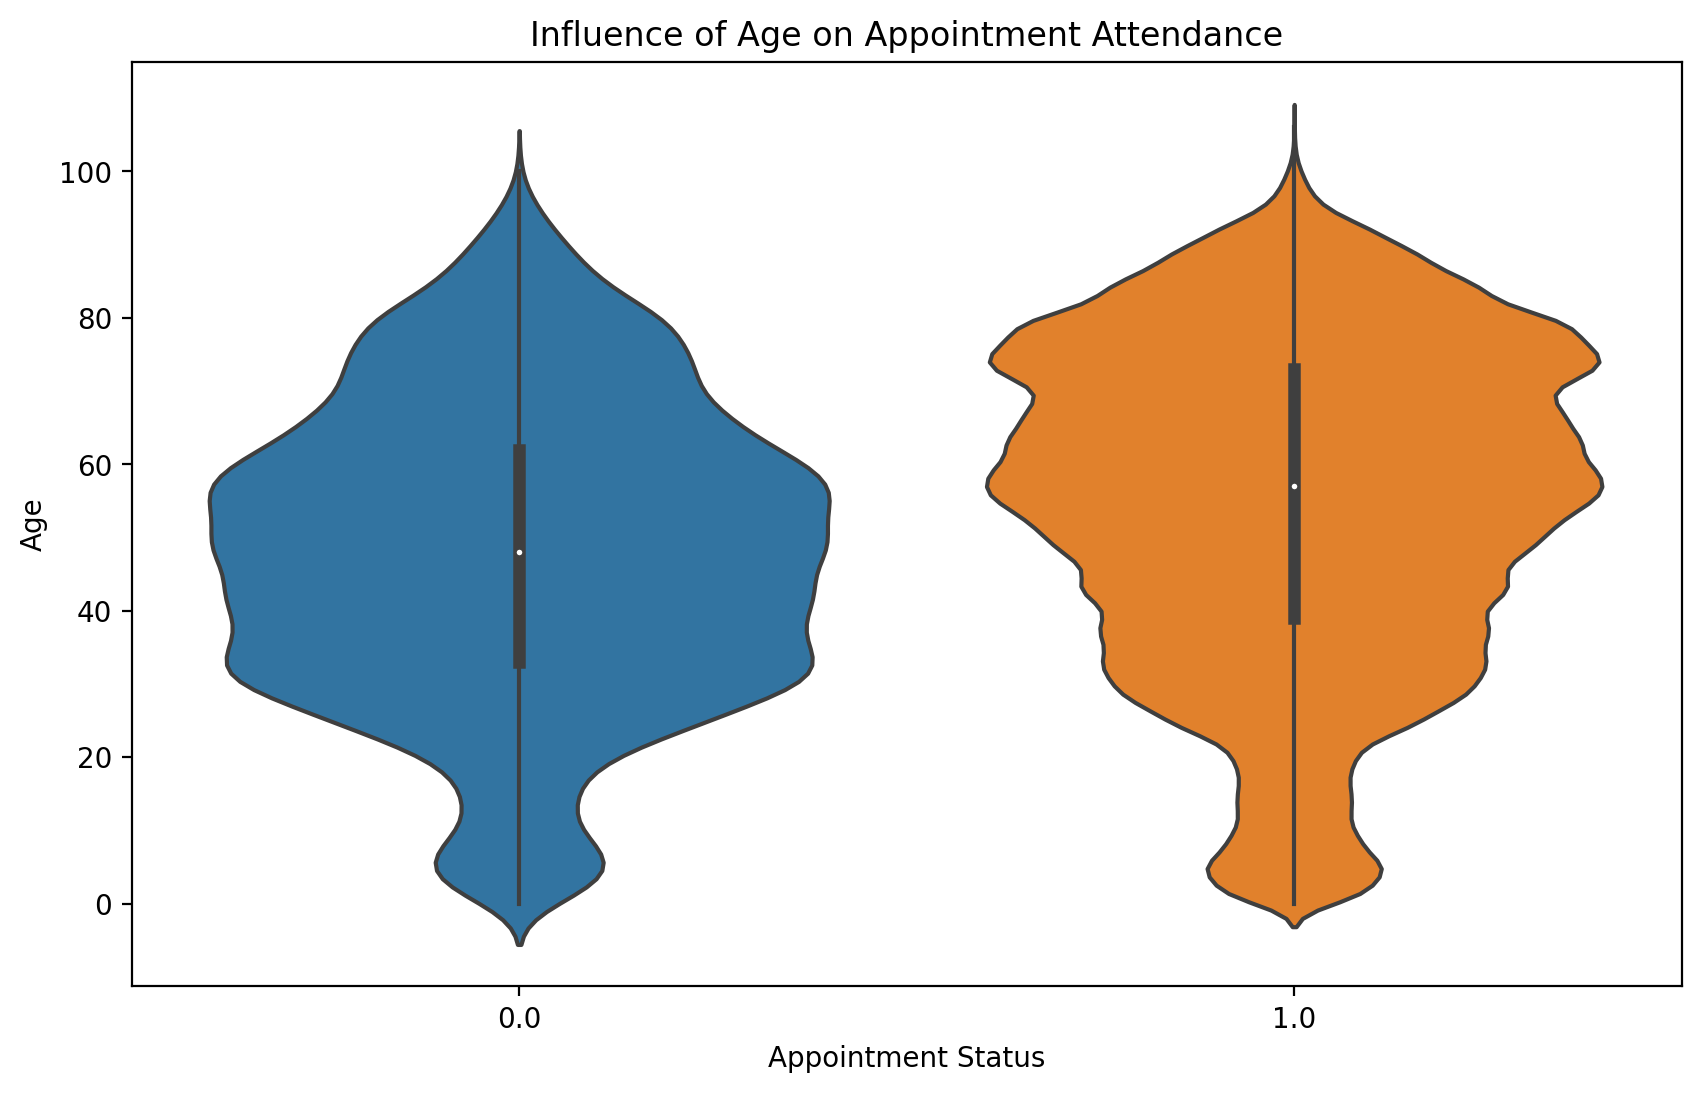

In [3]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the violin plot
sns.violinplot(data=data, x='Appointment_status', y='Age')

# Add title and labels
plt.title('Influence of Age on Appointment Attendance')
plt.xlabel('Appointment Status')
plt.ylabel('Age')

# Show the plot
plt.show()

# Sex

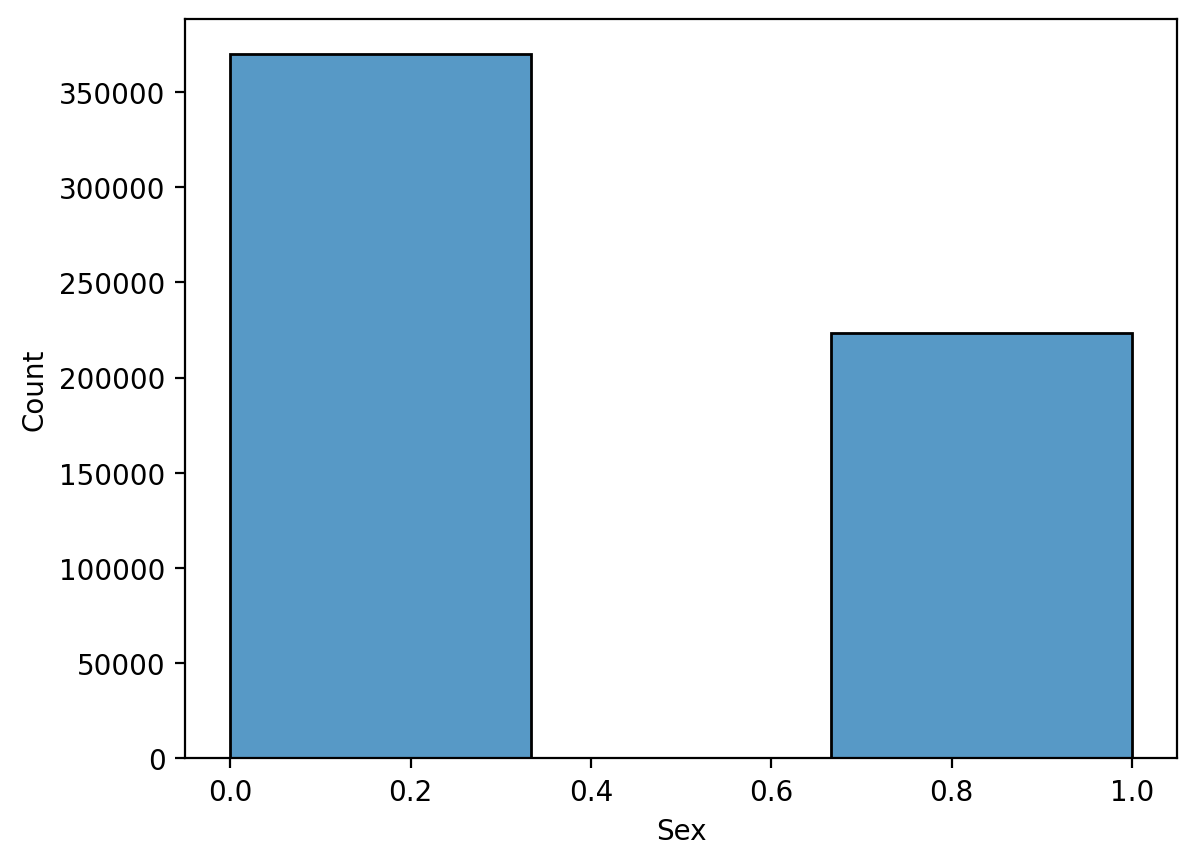

In [4]:
sns.histplot(data['Sex'], bins=3);

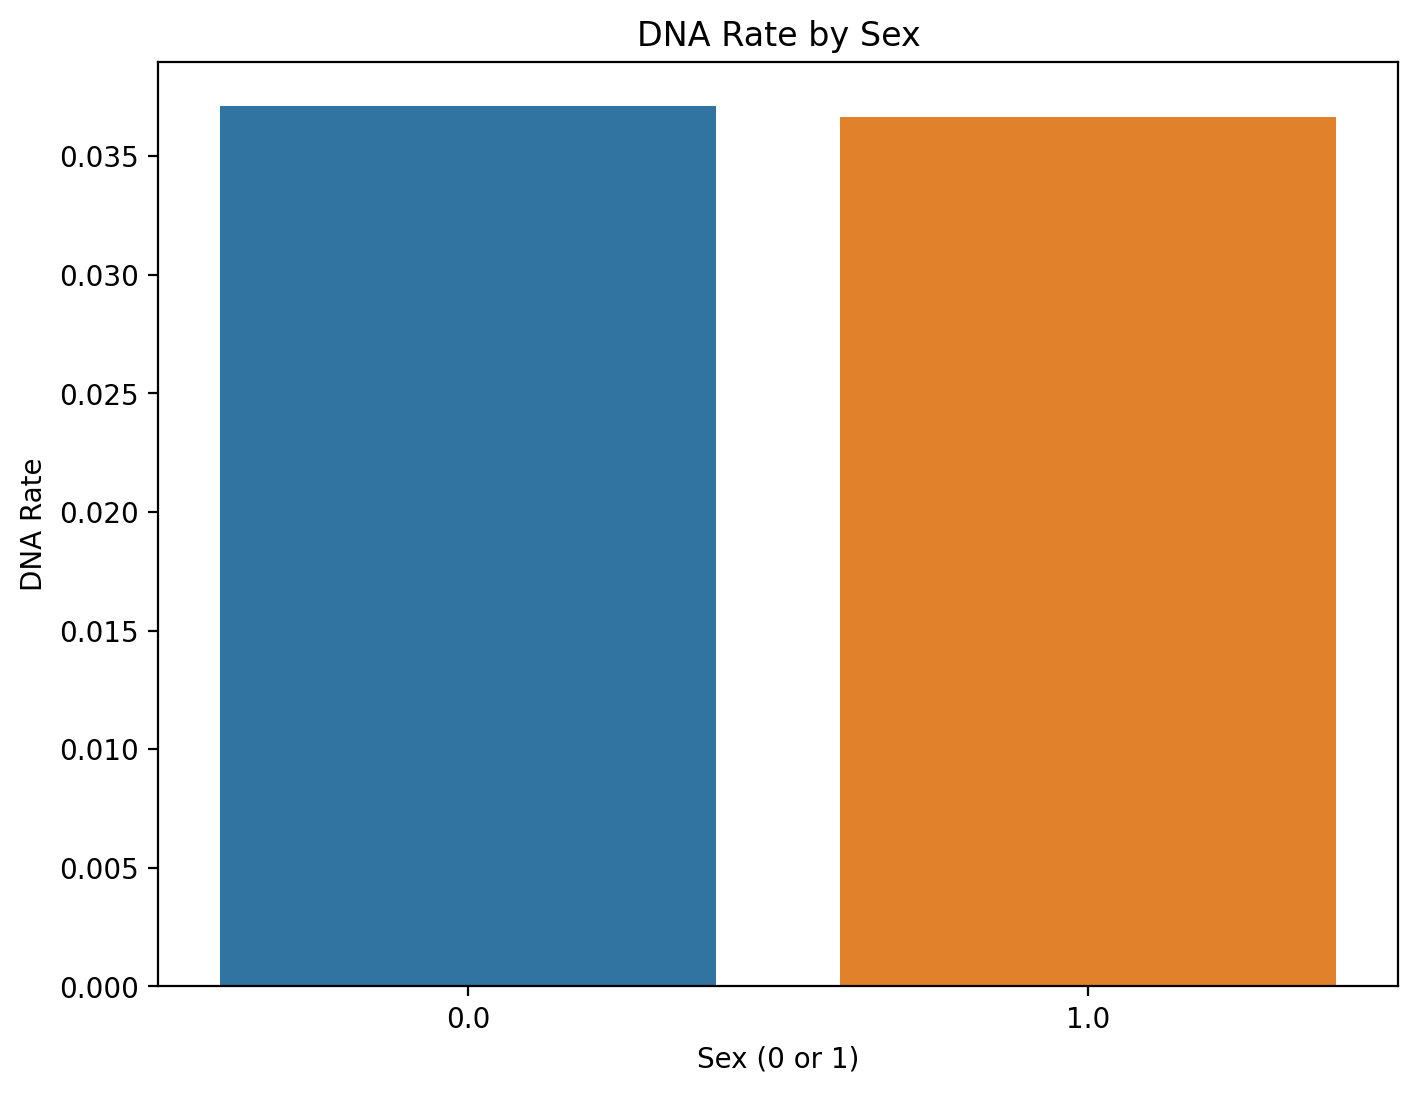

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, let's group by 'Sex' and calculate the mean of 'Appointment_status'
# The mean will give us the rate of "Did Attend" for each 'Sex'
attendance_rate = data.groupby('Sex')['Appointment_status'].mean()

# Now, let's find the DNA rate by subtracting from 1
dna_rate = 1 - attendance_rate
dna_rate = dna_rate.reset_index()  # Reset the index to make it easier to plot
dna_rate.columns = ['Sex', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar plot
sns.barplot(data=dna_rate, x='Sex', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by Sex')
plt.xlabel('Sex (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


# Electronic Frailty Index 

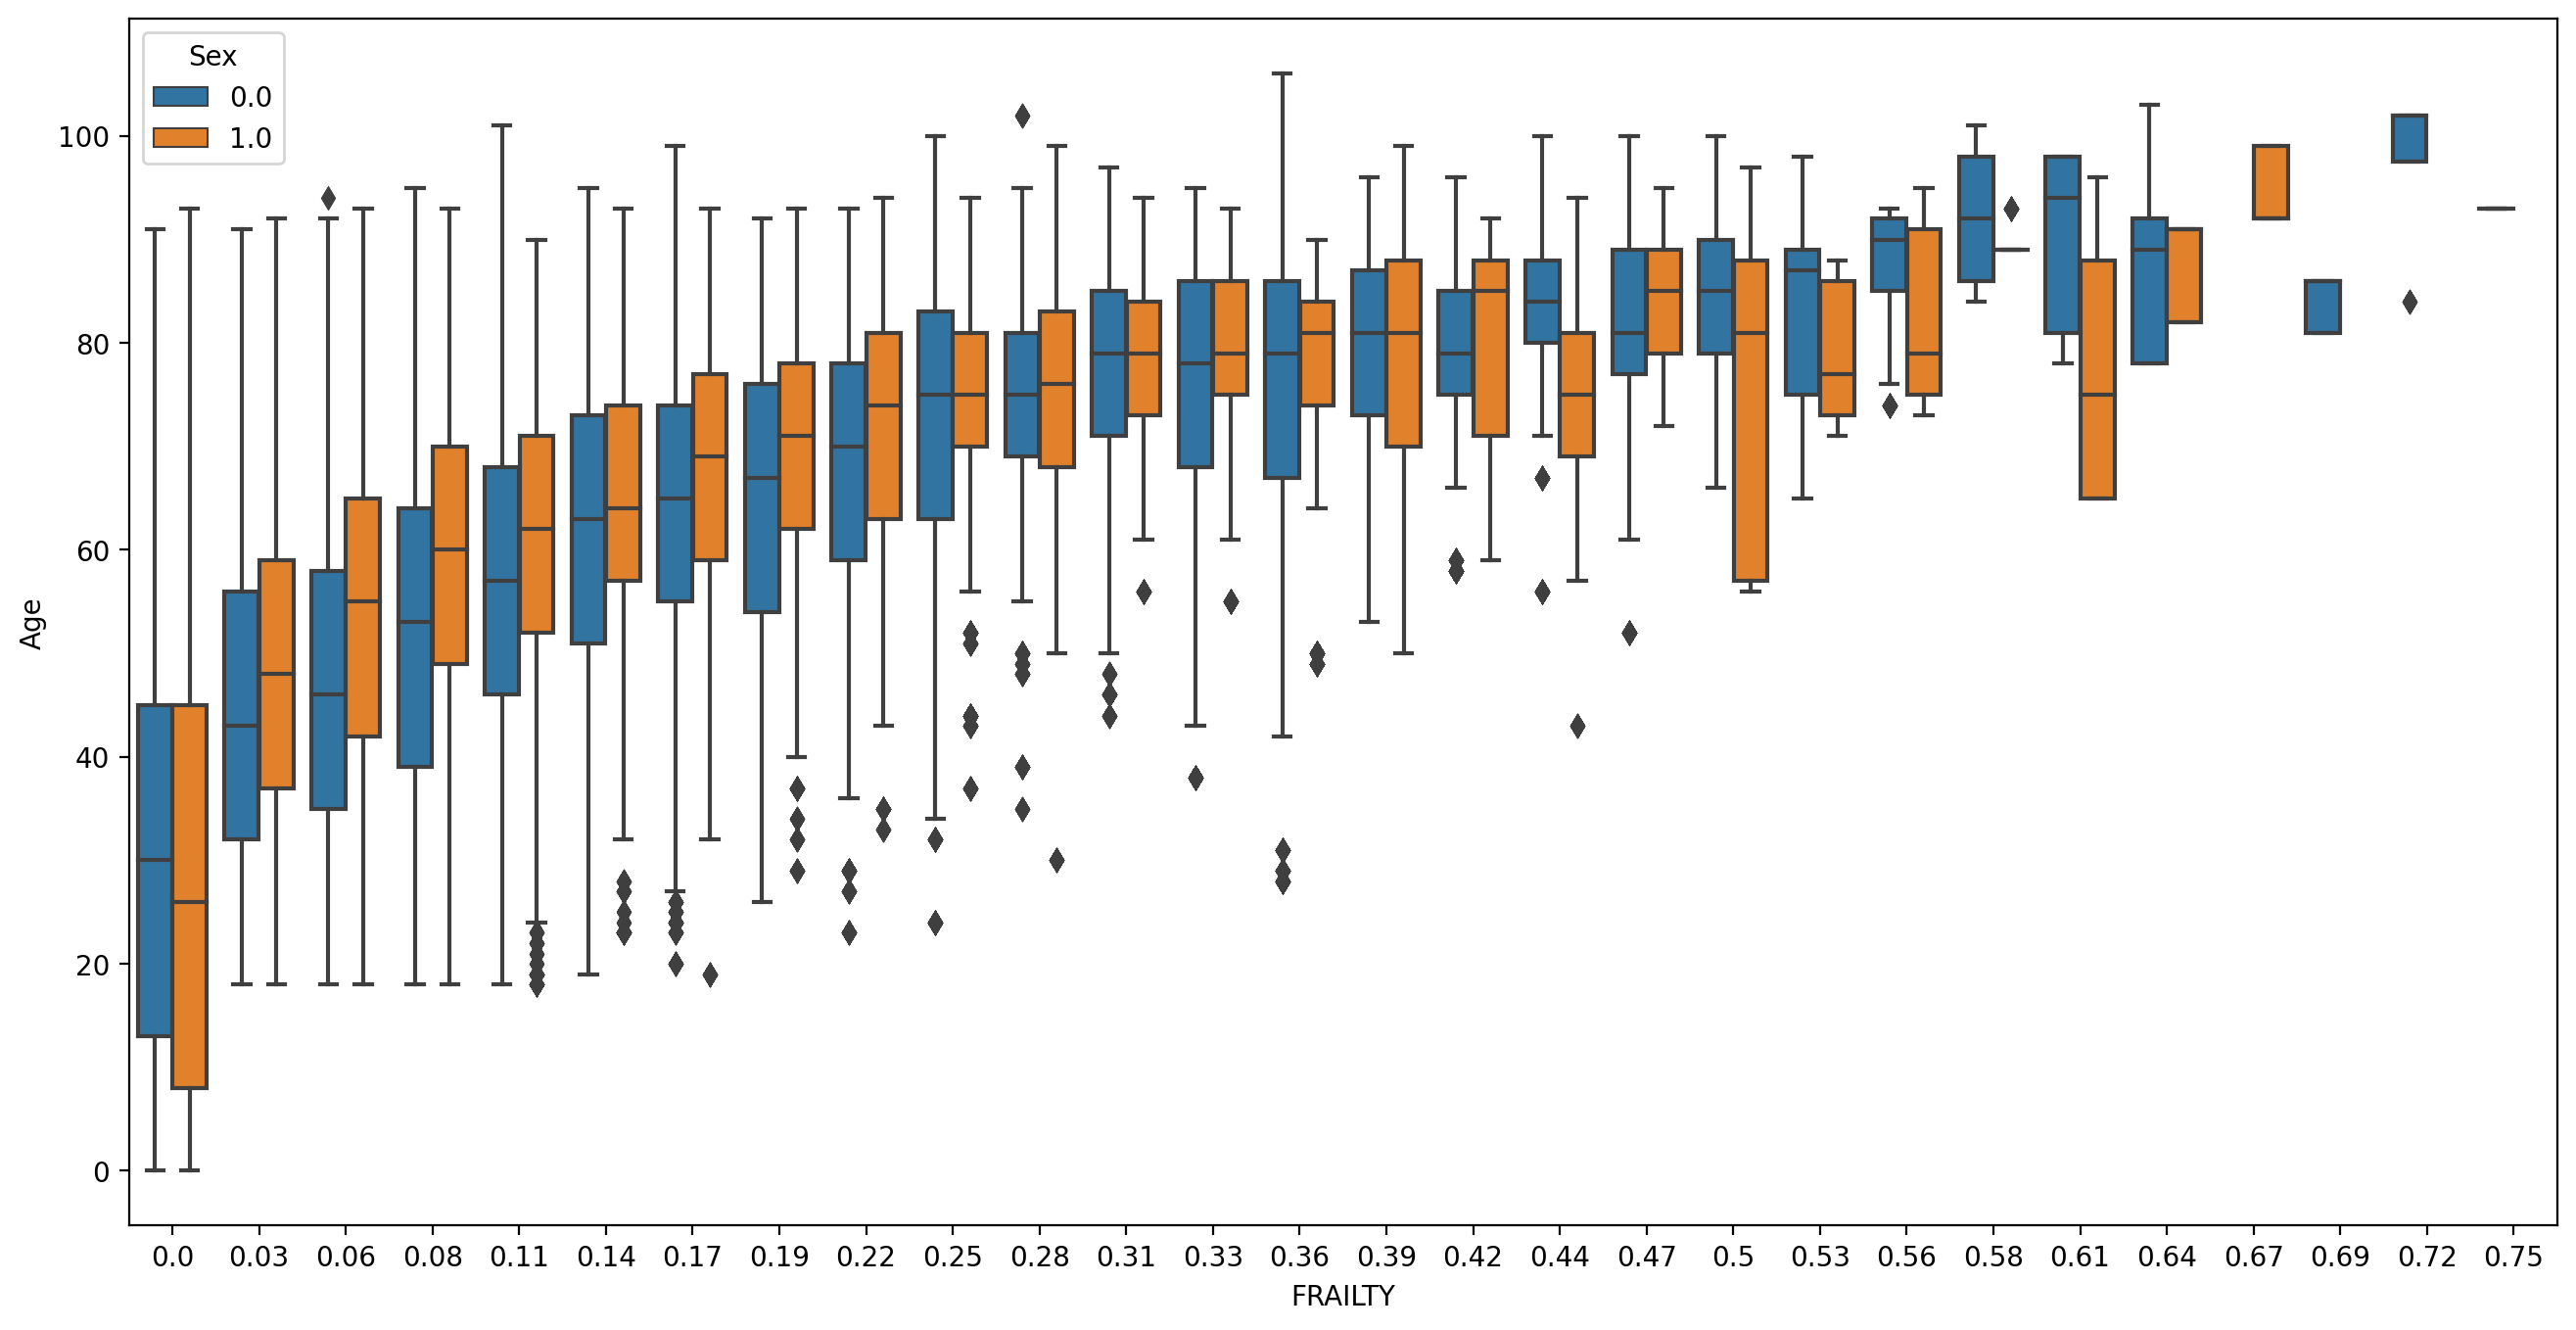

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(16, 8))

# Create the box plot
sns.boxplot(data=data, x='FRAILTY', y='Age', hue='Sex')

# Show the plot
plt.show()

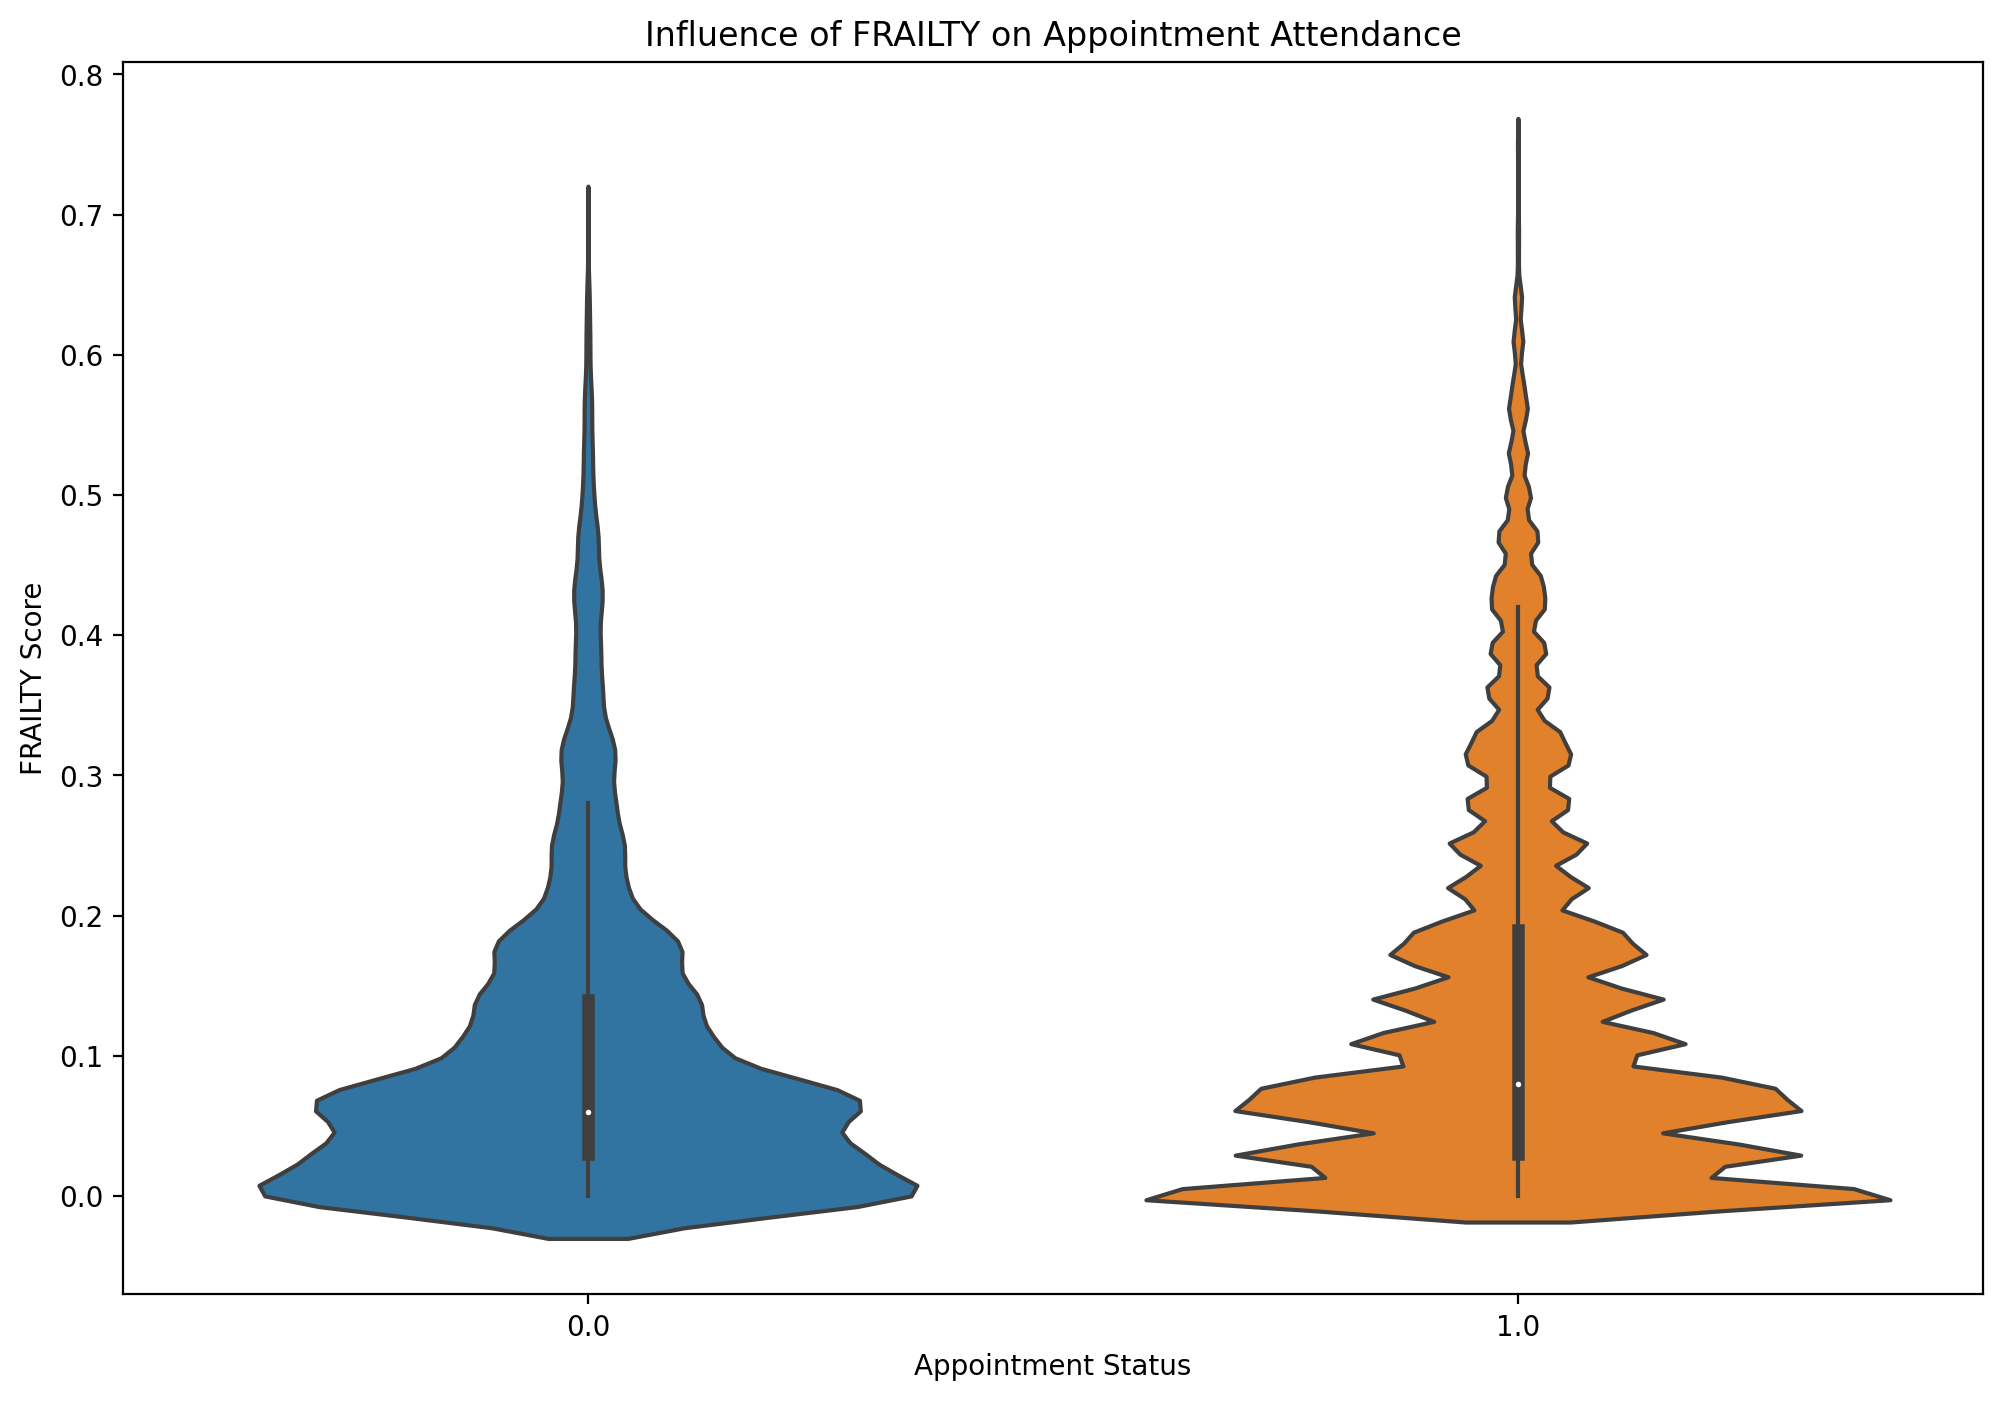

In [7]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the violin plot
sns.violinplot(data=data, x='Appointment_status', y='FRAILTY')

# Add title and labels
plt.title('Influence of FRAILTY on Appointment Attendance')
plt.xlabel('Appointment Status')
plt.ylabel('FRAILTY Score')

# Show the plot
plt.show()


# Chronic Conditions
Comparing DNA Rate for having a Chronic Disease = 1 <BR>
**DEPRESSION**	
**OBESITY**	
**IHD**	
**DM**	
**HPT**	
**NDHG**	
**SMI**

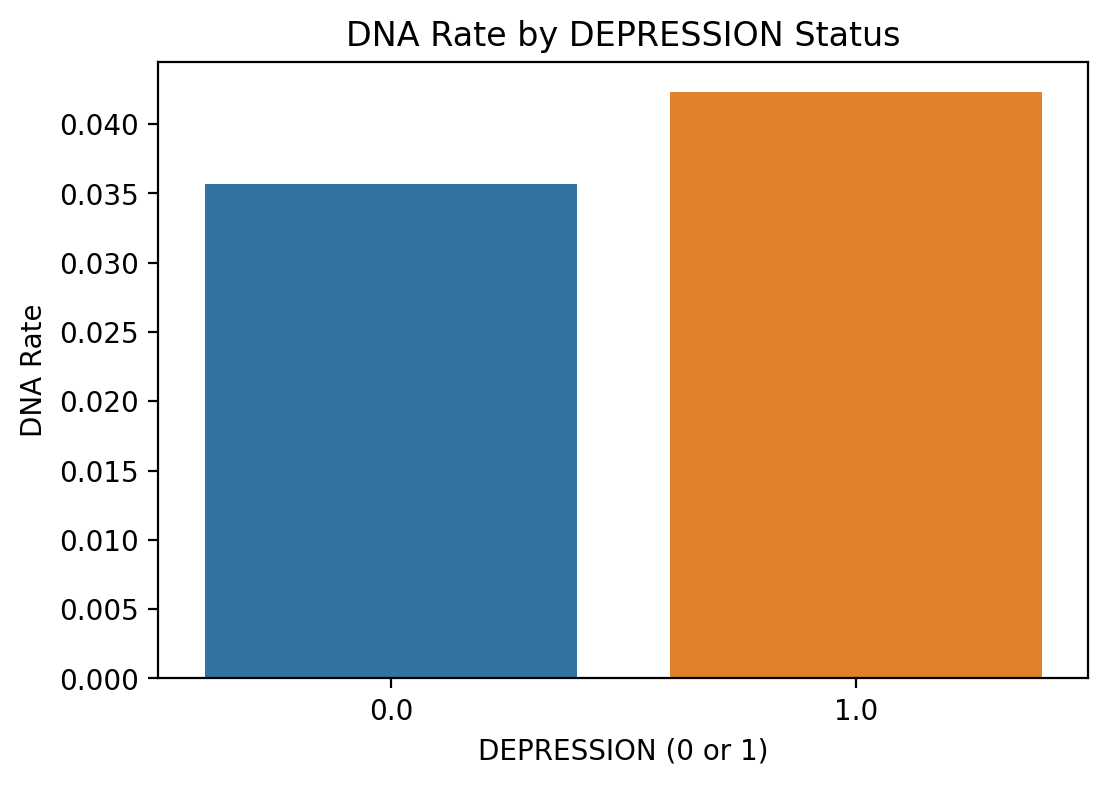

In [15]:


# Calculate the "Did Attend" rate for each DEPRESSION category (0 or 1)
attendance_rate_by_depression = data.groupby('DEPRESSION')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_depression = 1 - attendance_rate_by_depression
dna_rate_by_depression = dna_rate_by_depression.reset_index()  # Reset index for plotting
dna_rate_by_depression.columns = ['DEPRESSION', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_depression, x='DEPRESSION', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by DEPRESSION Status')
plt.xlabel('DEPRESSION (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


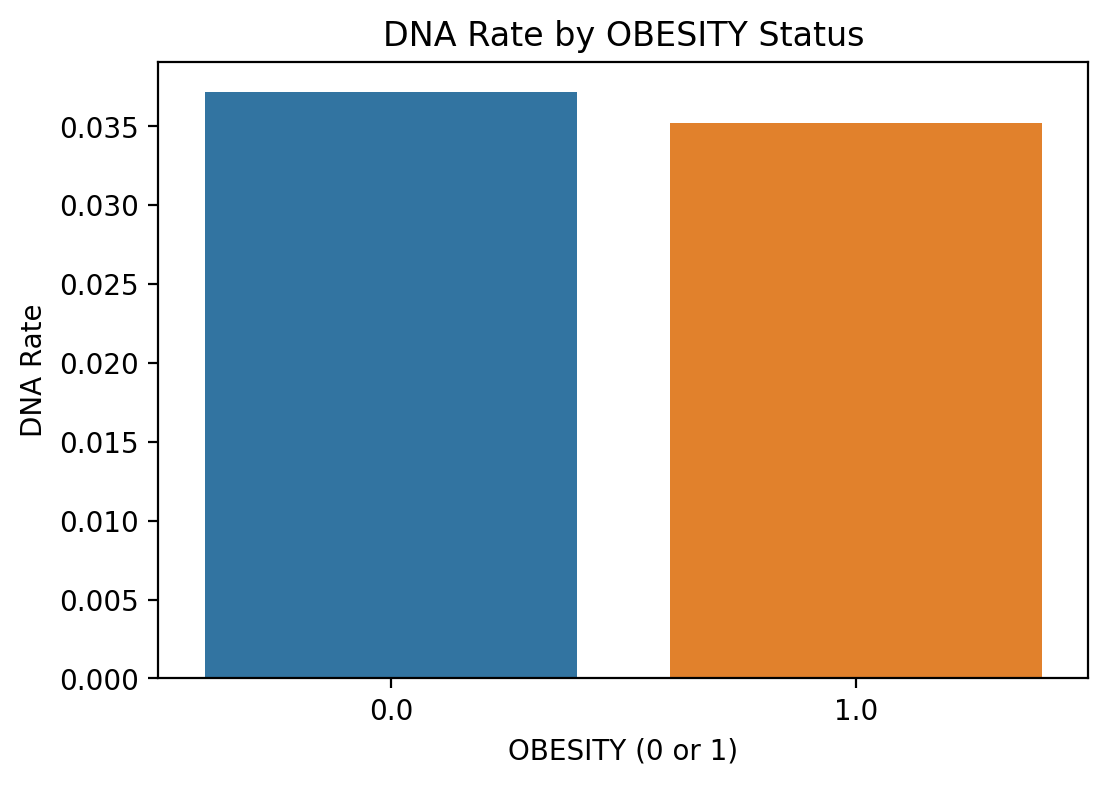

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the "Did Attend" rate for each DEPRESSION category (0 or 1)
attendance_rate_by_depression = data.groupby('OBESITY')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_depression = 1 - attendance_rate_by_depression
dna_rate_by_depression = dna_rate_by_depression.reset_index()  # Reset index for plotting
dna_rate_by_depression.columns = ['OBESITY', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_depression, x='OBESITY', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by OBESITY Status')
plt.xlabel('OBESITY (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


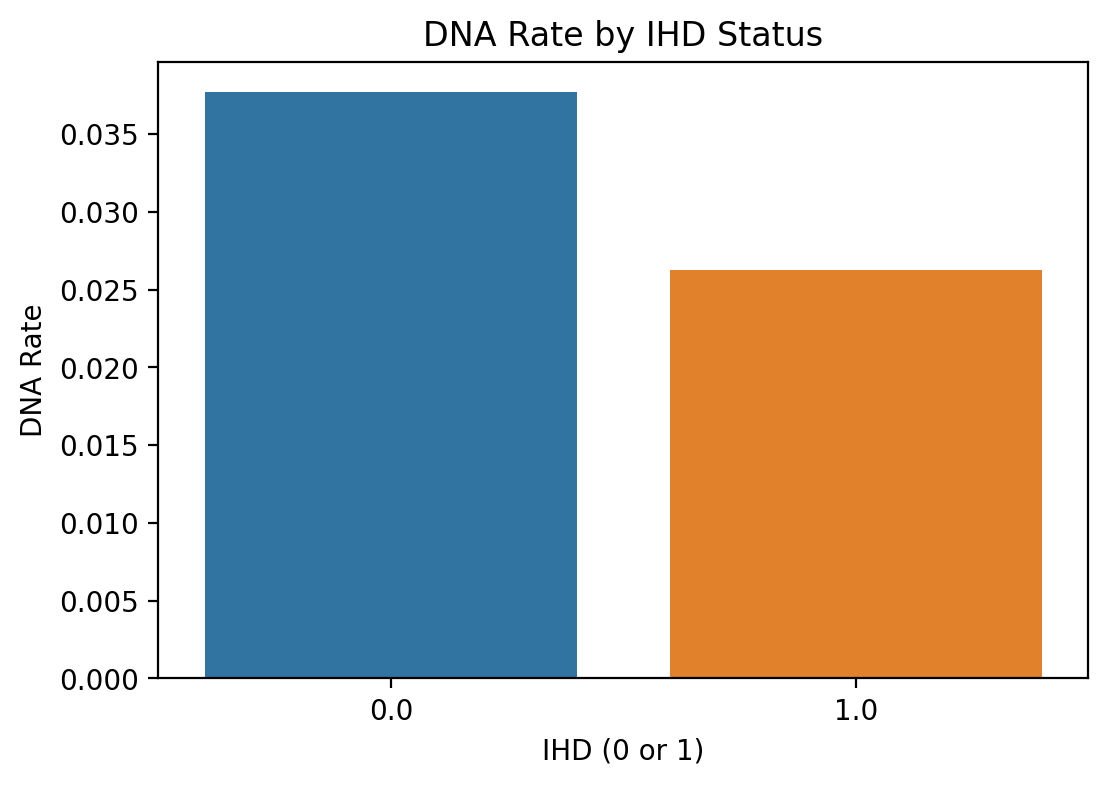

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the "Did Attend" rate for each IHD category (0 or 1)
attendance_rate_by_ihd = data.groupby('IHD')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_ihd = 1 - attendance_rate_by_ihd
dna_rate_by_ihd = dna_rate_by_ihd.reset_index()  # Reset index for plotting
dna_rate_by_ihd.columns = ['IHD', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_ihd, x='IHD', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by IHD Status')
plt.xlabel('IHD (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


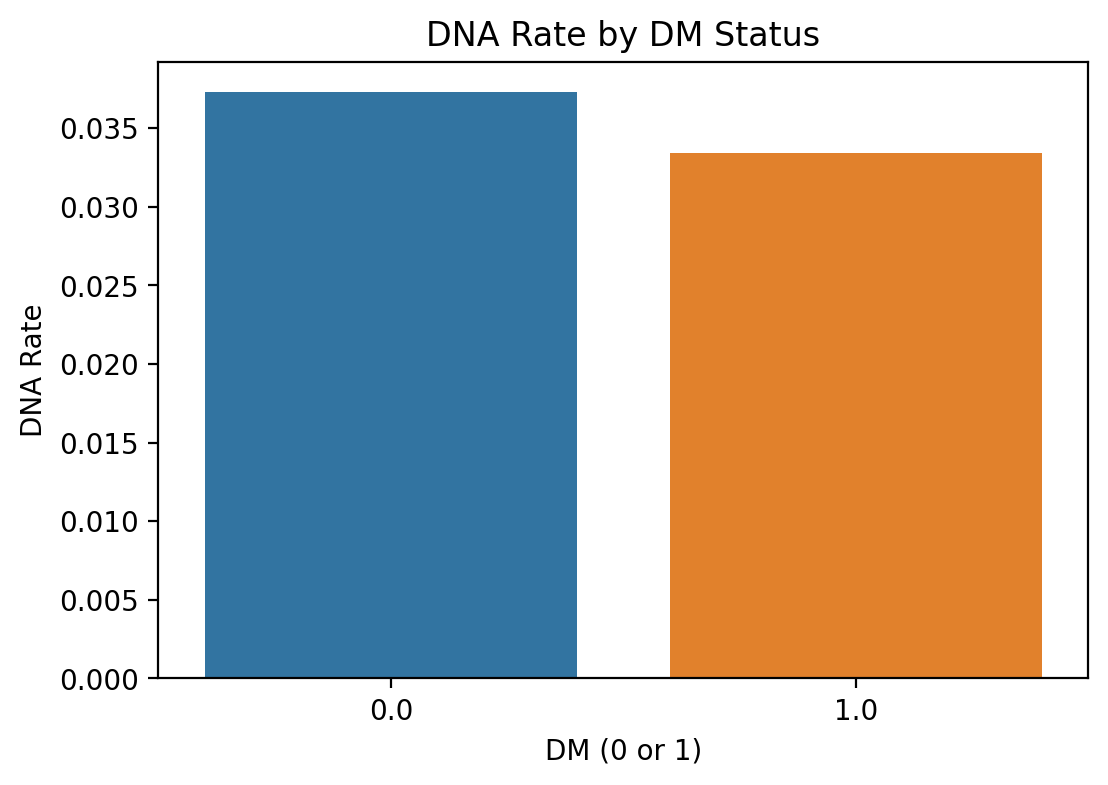

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the "Did Attend" rate for each DM category (0 or 1)
attendance_rate_by_dm = data.groupby('DM')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_dm = 1 - attendance_rate_by_dm
dna_rate_by_dm = dna_rate_by_dm.reset_index()  # Reset index for plotting
dna_rate_by_dm.columns = ['DM', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_dm, x='DM', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by DM Status')
plt.xlabel('DM (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


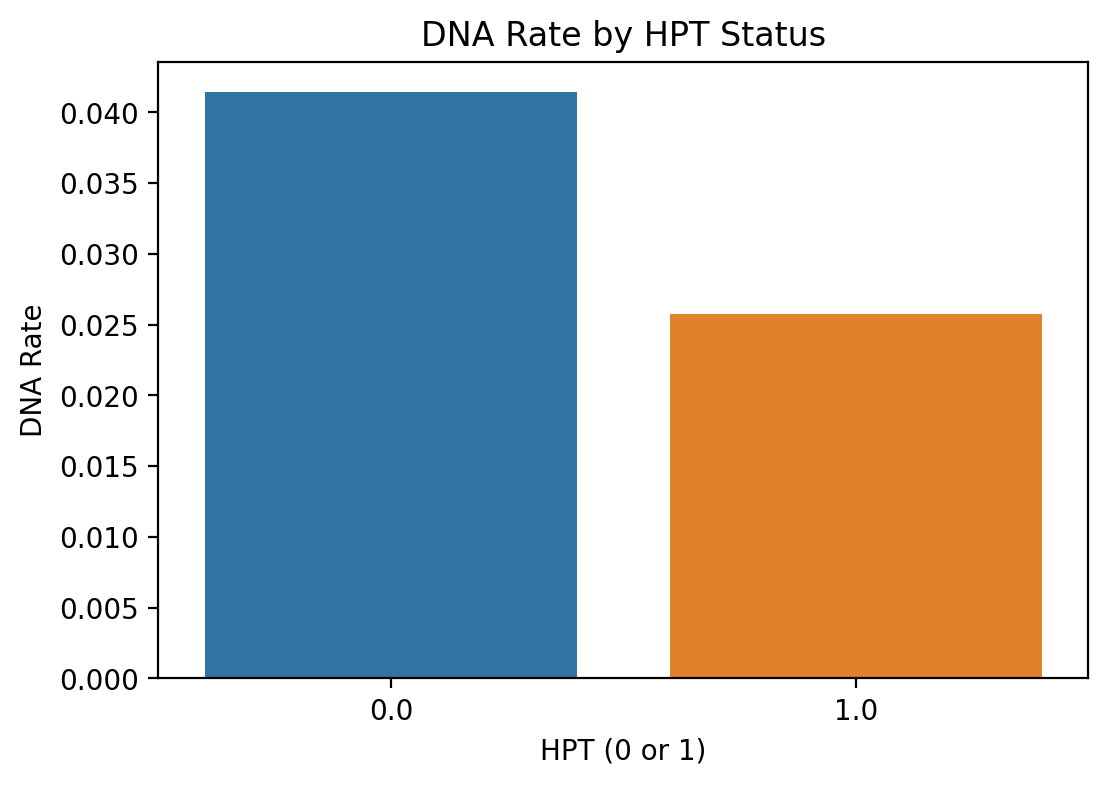

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the "Did Attend" rate for each HPT category (0 or 1)
attendance_rate_by_hpt = data.groupby('HPT')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_hpt = 1 - attendance_rate_by_hpt
dna_rate_by_hpt = dna_rate_by_hpt.reset_index()  # Reset index for plotting
dna_rate_by_hpt.columns = ['HPT', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_hpt, x='HPT', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by HPT Status')
plt.xlabel('HPT (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


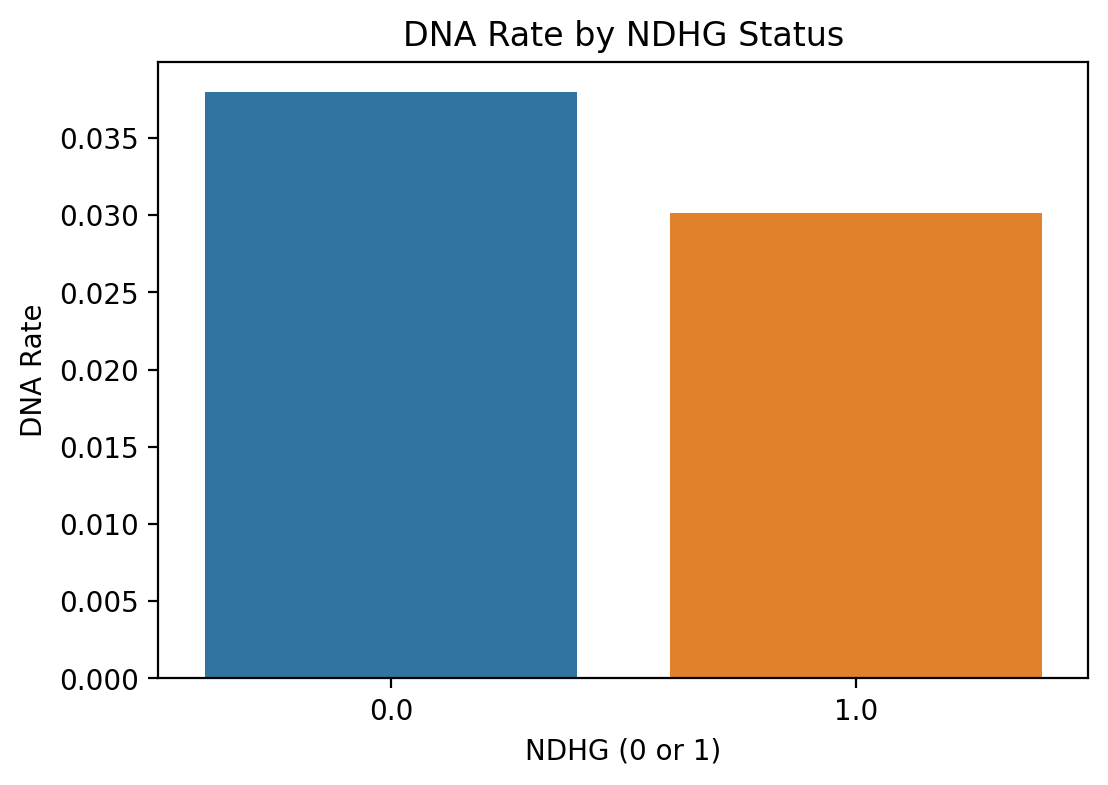

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the "Did Attend" rate for each NDHG category (0 or 1)
attendance_rate_by_ndhg = data.groupby('NDHG')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_ndhg = 1 - attendance_rate_by_ndhg
dna_rate_by_ndhg = dna_rate_by_ndhg.reset_index()  # Reset index for plotting
dna_rate_by_ndhg.columns = ['NDHG', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_ndhg, x='NDHG', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by NDHG Status')
plt.xlabel('NDHG (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


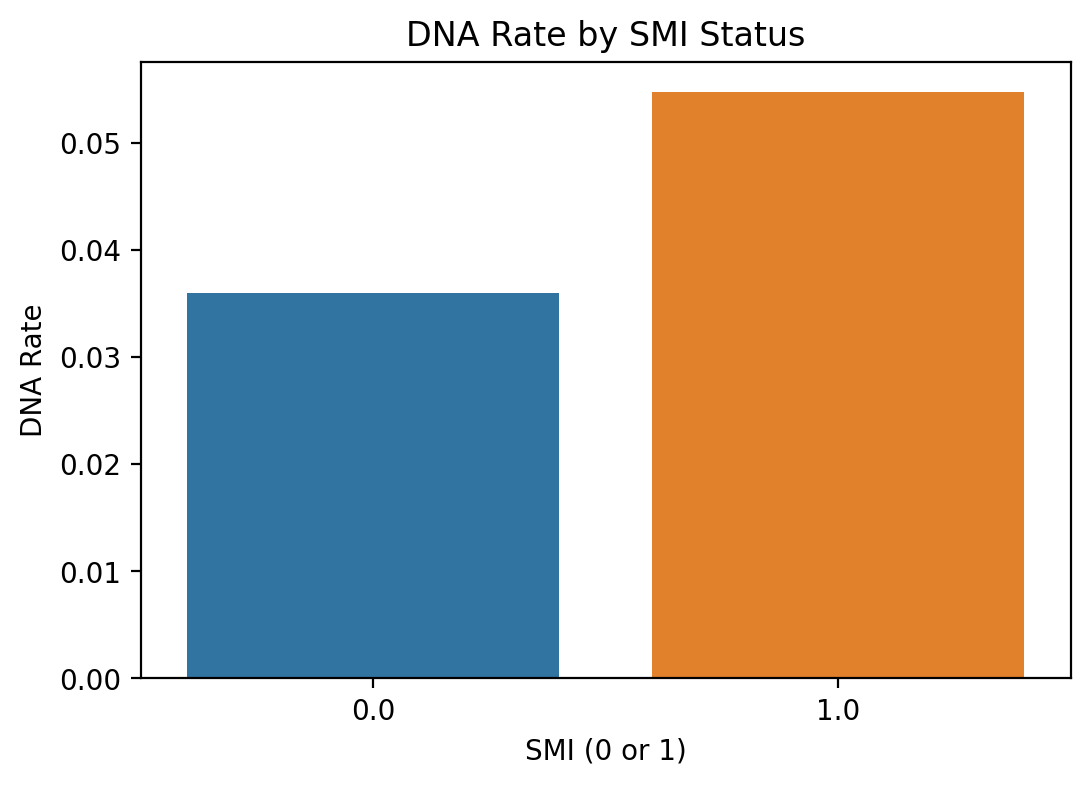

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the "Did Attend" rate for each SMI category (0 or 1)
attendance_rate_by_smi = data.groupby('SMI')['Appointment_status'].mean()

# Calculate the DNA rate by subtracting from 1
dna_rate_by_smi = 1 - attendance_rate_by_smi
dna_rate_by_smi = dna_rate_by_smi.reset_index()  # Reset index for plotting
dna_rate_by_smi.columns = ['SMI', 'DNA_Rate']  # Rename the columns

# Set the figure size
plt.figure(figsize=(6, 4))

# Create the bar plot
sns.barplot(data=dna_rate_by_smi, x='SMI', y='DNA_Rate')

# Add title and labels
plt.title('DNA Rate by SMI Status')
plt.xlabel('SMI (0 or 1)')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()


# IMD2023

<Axes: xlabel='IMD2023', ylabel='Count'>

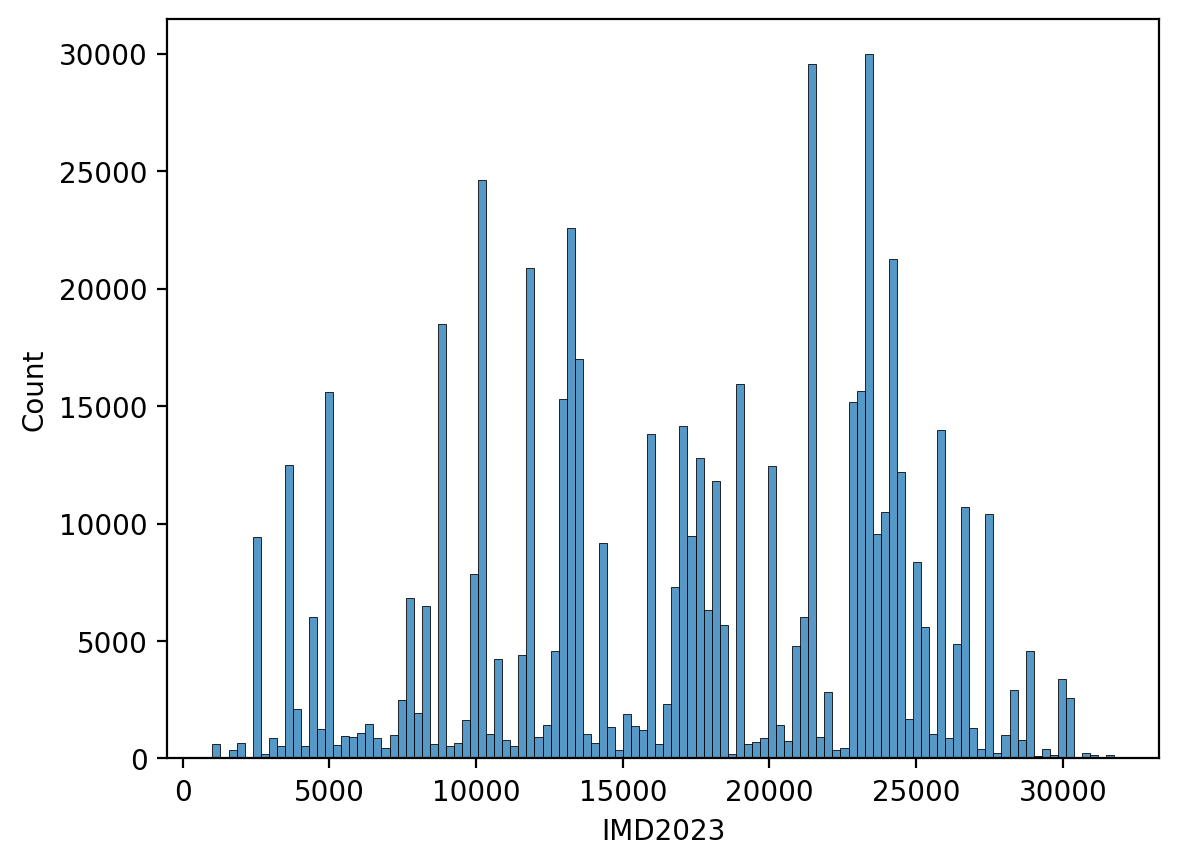

In [25]:
sns.histplot(data['IMD2023'])

In [26]:
# Calculate the "Did Attend" rate for each IMD2023 value
attendance_by_imd2023 = data.groupby('IMD2023')['Appointment_status'].mean()

# Calculate the DNA rate
dna_rate_by_imd2023 = 1 - attendance_by_imd2023
dna_rate_by_imd2023 = dna_rate_by_imd2023.reset_index()
dna_rate_by_imd2023.columns = ['IMD2023', 'DNA_Rate']


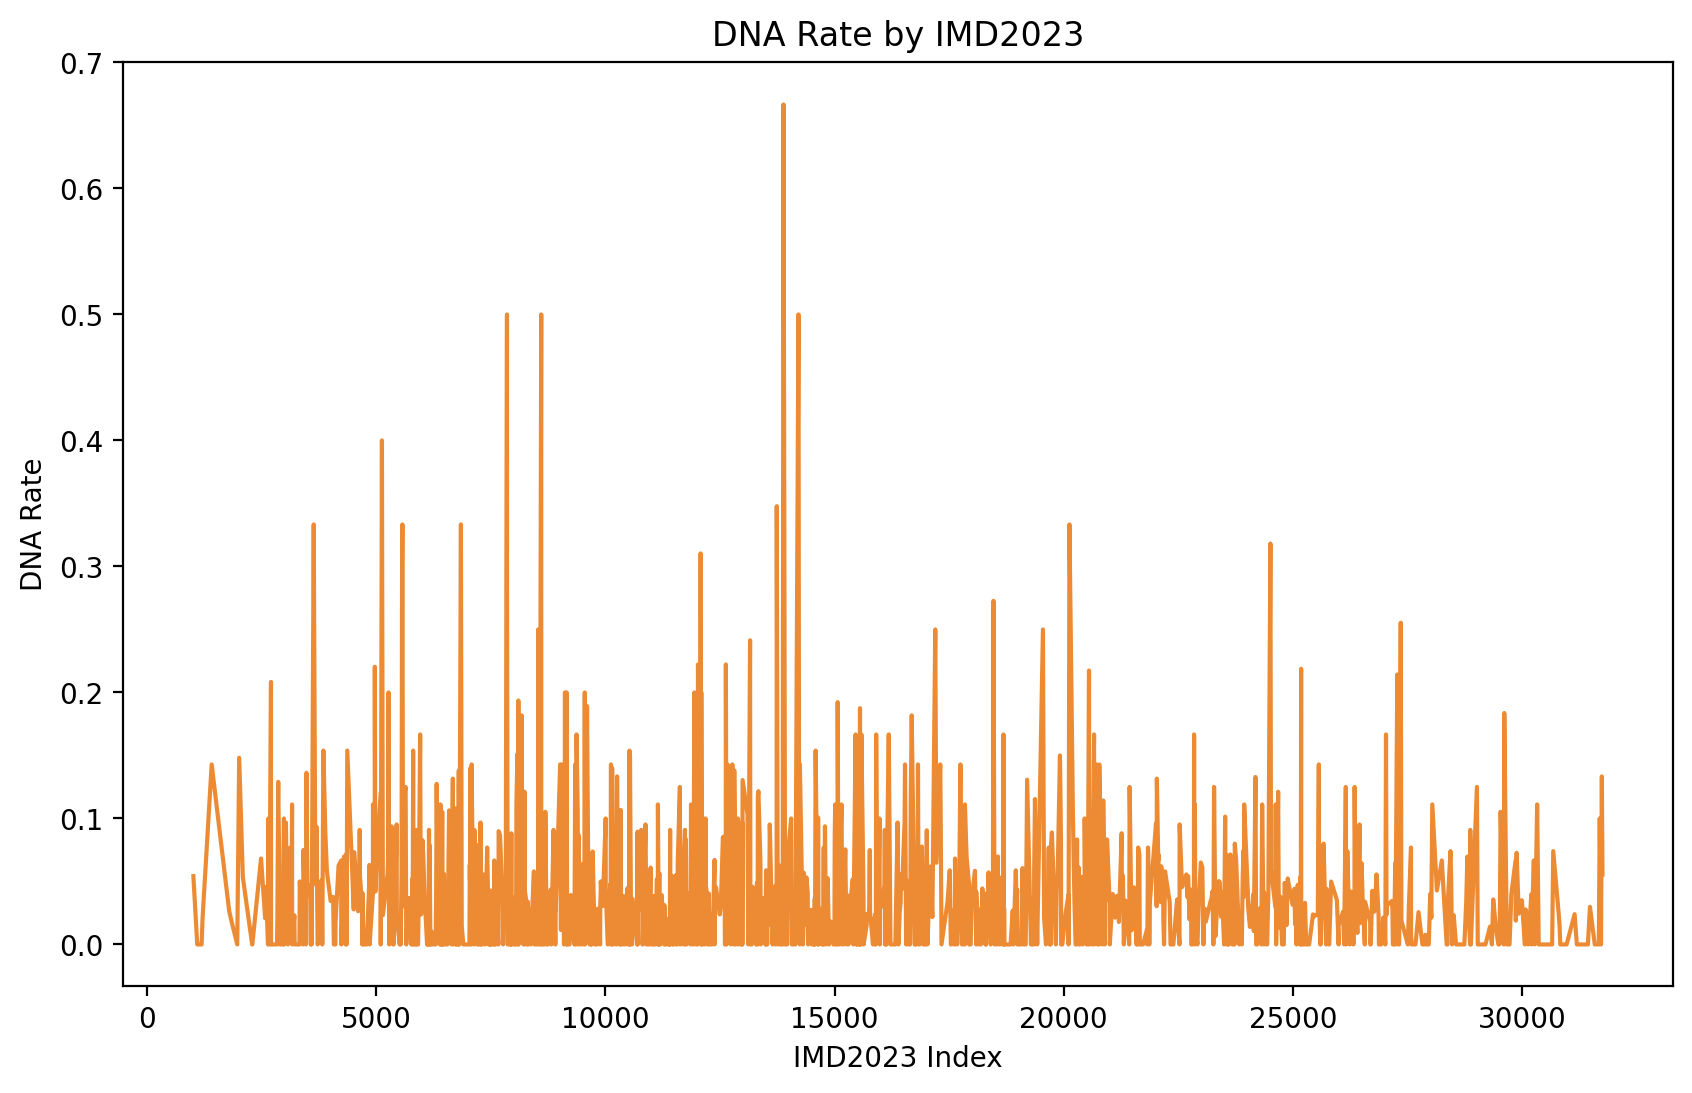

In [29]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=dna_rate_by_imd2023, x='IMD2023', y='DNA_Rate', color='#ec8b33')

# Add title and labels
plt.title('DNA Rate by IMD2023')
plt.xlabel('IMD2023 Index')
plt.ylabel('DNA Rate')

# Show the plot
plt.show()
